In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Exercise 1**

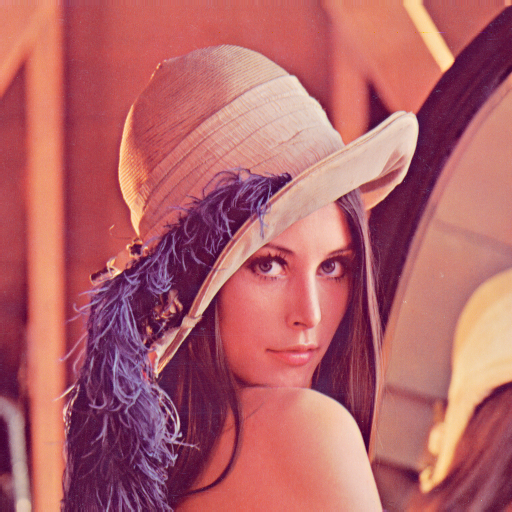

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "/content/drive/MyDrive/Deep_Learning /Workshop1/Lenna_(test_image).png"
image = Image.open(image_path)
display(image) #Using pillow



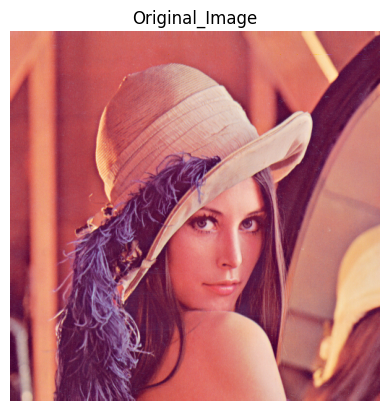

In [32]:
# Image open by using
plt.imshow(image)
plt.title("Original_Image")
plt.axis("off")
plt.show()


# 2.. Display only the top left corner of 100x100 pixels

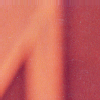

In [33]:
import numpy as np
image_array = np.array(image)
top_left = image_array[:100, :100]
top_left_image = Image.fromarray(top_left)
display(top_left_image)


# 3.Show the three color channels (R, G, B).

Pixel values for Red channel:
 [[226 226 223 ... 230 221 200]
 [226 226 223 ... 230 221 200]
 [226 226 223 ... 230 221 200]
 ...
 [ 84  84  92 ... 173 172 177]
 [ 82  82  96 ... 179 181 185]
 [ 82  82  96 ... 179 181 185]]
Pixel values for Green channel:
 [[137 137 137 ... 148 130  99]
 [137 137 137 ... 148 130  99]
 [137 137 137 ... 148 130  99]
 ...
 [ 18  18  27 ...  73  68  62]
 [ 22  22  32 ...  70  71  74]
 [ 22  22  32 ...  70  71  74]]
Pixel values for Blue channel:
 [[125 125 133 ... 122 110  90]
 [125 125 133 ... 122 110  90]
 [125 125 133 ... 122 110  90]
 ...
 [ 60  60  58 ...  84  76  79]
 [ 57  57  62 ...  79  81  81]
 [ 57  57  62 ...  79  81  81]]


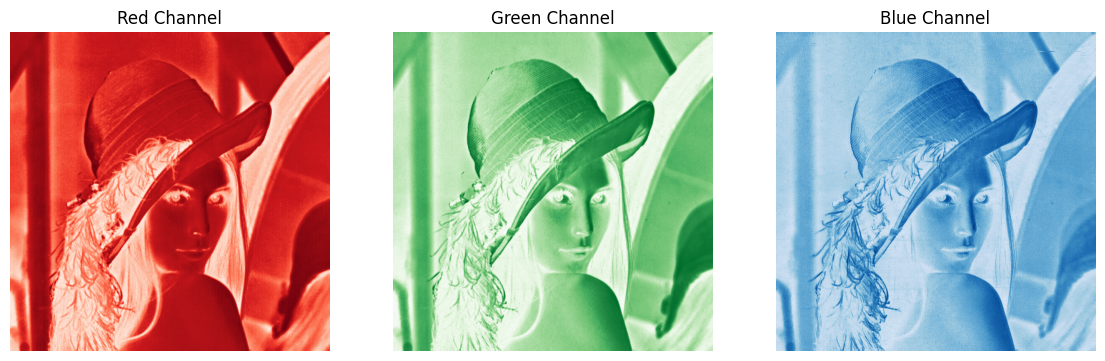

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))
channels = ["Red", "Green", "Blue"]  # Fixed "Greens" to "Green" for consistency
cmaps = ["Reds", "Greens", "Blues"]  # Corrected variable name

# Display each channel separately & Print RGB values
for i, channel in enumerate(channels):
    channel_image = image_array[:, :, i]  # Extract individual channel

    # Print pixel values
    print(f"Pixel values for {channel} channel:\n", channel_image)

    # Display the image
    axes[i].imshow(channel_image, cmap=cmaps[i])  # Use cmaps correctly
    axes[i].set_title(f"{channel} Channel")
    axes[i].axis("off")

plt.show()

# 4:. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

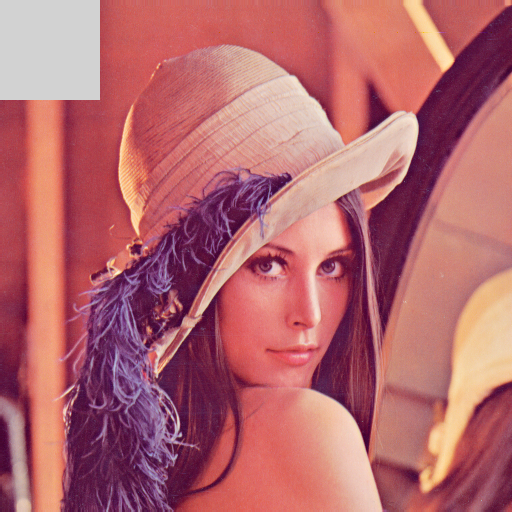

In [42]:

image_array = np.array(image)
# Modify the top-left 100x100 pixels to a gray value (same value for R, G, B)
modified_image = image_array.copy()
modified_image[:100, :100] = [210, 210, 210]  # Set all 3 channels to gray
# Convert back to Image and display
modified_image_pil = Image.fromarray(modified_image)
display(modified_image_pil)

# Exercise 2

1:Load and display a grayscale image.

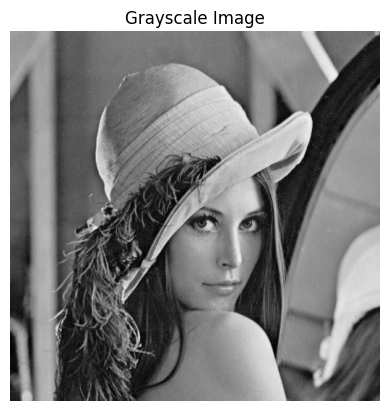

In [56]:
grayscale_image = image.convert("L")
plt.imshow(grayscale_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

2.Extract and display the middle section of the image (150 pixels).

Grayscale Image Shape: (512, 512)


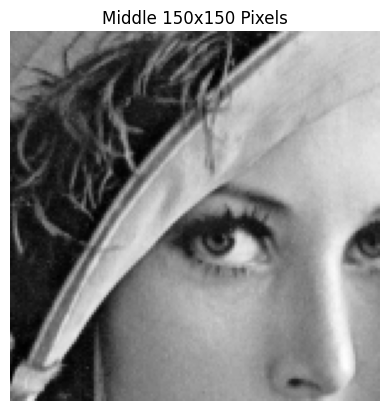

In [50]:
grayscale_image = image.convert("L")  # Convert to grayscale
grayscale_array = np.array(grayscale_image)
print("Grayscale Image Shape:", grayscale_array.shape)  # Should output (height, width)
# Proceed only if the image is correctly converted to grayscale
if len(grayscale_array.shape) == 2:
    h, w = grayscale_array.shape
    # Define start points for cropping
    start_h = h // 2 - 75  # Center height
    start_w = w // 2 - 75  # Center width
    middle_section = grayscale_array[start_h:start_h+150, start_w:start_w+150]
    plt.imshow(middle_section, cmap="gray")
    plt.title("Middle 150x150 Pixels")
    plt.axis("off")
    plt.show()

3. a simple threshold to the image


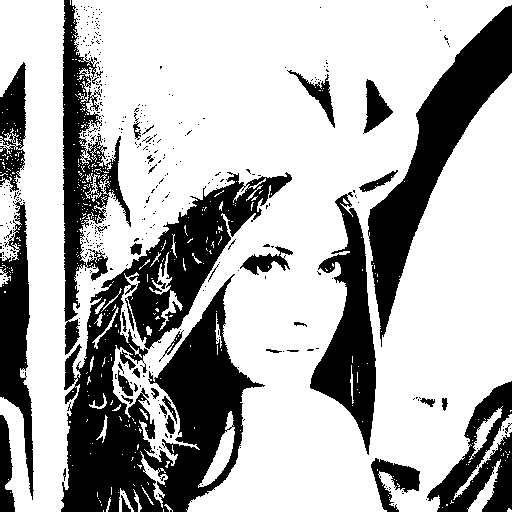

In [51]:
threshold_image = np.where(grayscale_array < 100, 0, 255).astype(np.uint8)
binary_image = Image.fromarray(threshold_image)
display(binary_image)

4.Rotate the image 90 degrees clockwise and display the result.

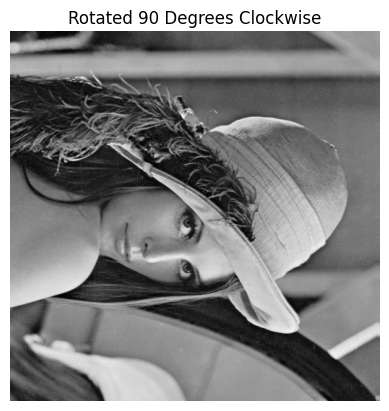

In [52]:
rotated_image = grayscale_image.rotate(-90, expand=True)
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotated 90 Degrees Clockwise")
plt.axis("off")
plt.show()


5.Convert the grayscale image to an RGB image.

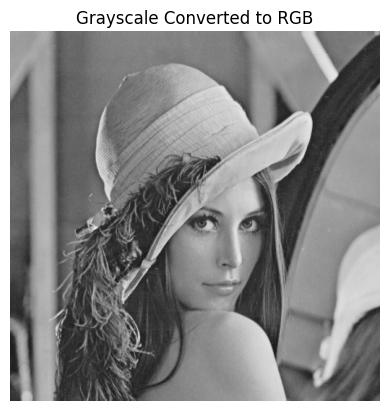

In [55]:
rgb_image = Image.merge("RGB", (grayscale_image, grayscale_image, grayscale_image))
plt.imshow(rgb_image)
plt.title("Grayscale Converted to RGB")
plt.axis("off")
plt.show()


# Exercise 3


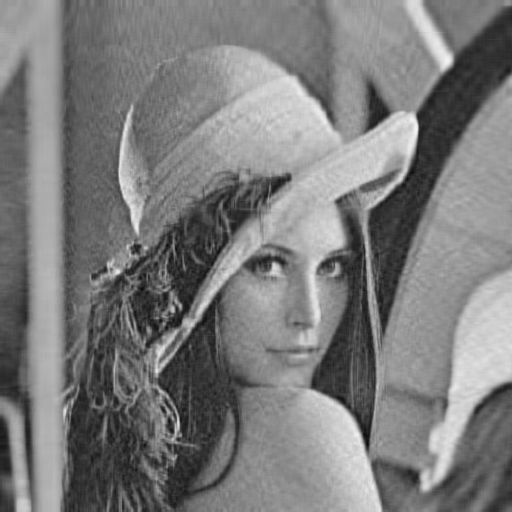

In [57]:
image_array = np.array(grayscale_image, dtype=float)
mean = np.mean(image_array, axis=0)
centered_data = image_array - mean
# Compute covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]
k = 50  # Select 50 principal components
eigenvectors_k = eigenvectors[:, :k]
# Project image onto reduced subspace
compressed_data = np.dot(centered_data, eigenvectors_k)
decompressed_data = np.dot(compressed_data, eigenvectors_k.T) + mean
decompressed_image = Image.fromarray(np.clip(decompressed_data, 0, 255).astype(np.uint8))
display(decompressed_image)

Visualization

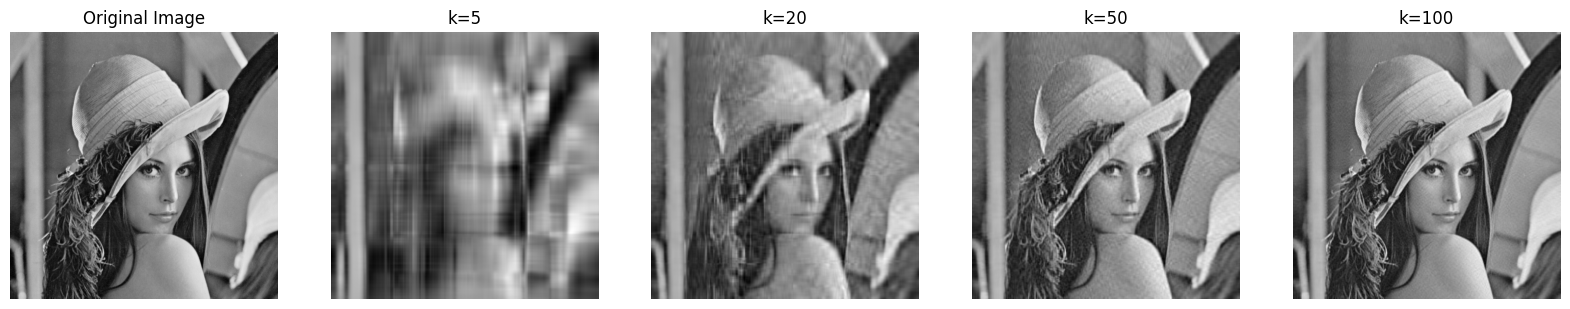

In [61]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
k_values = [5, 20, 50, 100]

axes[0].imshow(grayscale_array, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

for i, k in enumerate(k_values):
    eigenvectors_subset = eigenvectors[:, :k]
    compressed_subset = np.dot(centered_data, eigenvectors_subset)
    decompressed_subset = np.dot(compressed_subset, eigenvectors_subset.T) + mean
    axes[i+1].imshow(decompressed_subset, cmap="gray")
    axes[i+1].set_title(f"k={k}")
    axes[i+1].axis("off")

plt.show()
